## Part 2: Import Data 
Import the `TableauSalesData.csv`

In [193]:
import pandas as pd
df = pd.read_csv('TableauSalesData.csv')

## Part 3: Learn about your data 
- Print the first 10 observations
- Print the columns
- List the descriptive stats for numerical columns. Which columns make sense to look at for descriptive stats?
- Which columns are categorical?Get a list of unique values in non-numeric (categorical columns)

In [194]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,4919,CA-2017-160304,1/2/17,1/7/17,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,20877,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,0.0,38.2668
1,4920,CA-2017-160304,1/2/17,1/7/17,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,20877,East,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,0.0,67.2742
2,3074,CA-2017-125206,1/3/17,1/5/17,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,90045,West,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,0.0,28.6150
3,8604,US-2017-116365,1/3/17,1/8/17,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,78207,Central,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,0.2,-5.2640
4,8605,US-2017-116365,1/3/17,1/8/17,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,78207,Central,TEC-AC-10002942,Technology,Accessories,WD My Passport Ultra 1TB Portable External Har...,165.60,3,0.2,-6.2100


In [195]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500800,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.162802,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

- From the data type for each column, wd can have an idea about which columns are categorical.
- Even though `Postal Code` is of integer type, keep in mind that it is categorical.
- 'Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category',
       'Product Name',  are categoriocal columns
-  'Sales', 'Quantity', 'Discount', 'Profit'  are numerical columns
- 'Order Date', 'Ship Date' are datetime variables.
- 'Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID' are identifiers, can be used to filet data for a specific cusomer, product, or an order.

Let us list the unique values of categorical variables:

In [17]:
nunique = []
un_elements=[]
for i in ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category', 'Product Name']:
    nunique.append(df[i].nunique())
    un_elements.append(df[i].unique())

In [19]:
nunique

[4, 3, 1, 531, 49, 4, 3, 17, 1850]

As you see from the unique number of elements for each categorical variable, `City` and `Product Name` have large number of uniaue values.

Let us list the `Sub-Category` variable's unique values:

In [20]:
df['Sub-Category'].unique()

array(['Bookcases', 'Phones', 'Storage', 'Accessories', 'Tables',
       'Binders', 'Copiers', 'Art', 'Furnishings', 'Paper', 'Envelopes',
       'Chairs', 'Fasteners', 'Appliances', 'Labels', 'Machines',
       'Supplies'], dtype=object)

In [199]:
df['Category'].nunique()

3

In [ ]:
read_csv(), unique(), head(), shape, describe(), df['Sub-Category'],
df[['Category','Sub-Category']],columns

In [200]:
df.shape

(9994, 21)

In [201]:
df[['Category','Sub-Category']]

,Category,Sub-Category
0,Furniture,Bookcases
1,Technology,Phones
2,Office Supplies,Storage
3,Technology,Accessories
4,Technology,Accessories
...,...,...
9989,Office Supplies,Binders
9990,Office Supplies,Storage
9991,Office Supplies,Fasteners
9992,Office Supplies,Supplies


## Part 4: Group and Aggregate Your Data

- Create a new dataframe with `Sub-Category`, `Profit`, and `Sales` columns. Name this new dataframe as `SubCatProfits`
- Find the total sales and profit for each sub category and sort these numbers by profit. Assign the result of this query to `TotalSubCatProfits`
- Find the total sales and profit for each category (be careful, you need to use your original dataset `df`, use only the `Category`, `Profit`, and `Sales` columns) and sort the two totals by profit. Assign the result to `CategoryProfitSales`
- Select `Category`, `Sub-Category`,`Profit`, and `Sales` columns from hyour data `df`. Use multi level grouping and group these columns by `Category` and `Sub-Category`. Find the total profit and sales for each category and sub-category level.


In [126]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [203]:
#['Sub-Category', 'Profit', 'Sales']
df[['Sub-Category', 'Profit', 'Sales']];


In [204]:
SubCatProfits = df[['Sub-Category', 'Profit', 'Sales']]
SubCatProfits.head()

,Sub-Category,Profit,Sales
0,Bookcases,38.2668,173.94
1,Phones,67.2742,231.98
2,Storage,28.6150,114.46
3,Accessories,-5.2640,30.08
4,Accessories,-6.2100,165.60


In [206]:
=SubCatProfits.groupby(by='Sub-Category').sum().sort_values(by='Profit')

,Profit,Sales
Sub-Category,,
Tables,-17725.4811,206965.5320
Bookcases,-3472.5560,114879.9963
Supplies,-1189.0995,46673.5380
Fasteners,949.5182,3024.2800
Machines,3384.7569,189238.6310
Labels,5546.2540,12486.3120
Art,6527.7870,27118.7920
Envelopes,6964.1767,16476.4020
Furnishings,13059.1436,91705.1640


In [23]:
TotalSubCatProfits = SubCatProfits.groupby(by='Sub-Category').sum().sort_values(by='Profit')
TotalSubCatProfits

,Profit,Sales
Sub-Category,,
Tables,-17725.4811,206965.5320
Bookcases,-3472.5560,114879.9963
Supplies,-1189.0995,46673.5380
Fasteners,949.5182,3024.2800
Machines,3384.7569,189238.6310
Labels,5546.2540,12486.3120
Art,6527.7870,27118.7920
Envelopes,6964.1767,16476.4020
Furnishings,13059.1436,91705.1640


In [208]:
df[['Category', 'Profit', 'Sales']].groupby(by='Category').sum()

,Profit,Sales
Category,,
Furniture,18451.2728,741999.7953
Office Supplies,122490.8008,719047.0320
Technology,145454.9481,836154.0330


In [26]:
CategoryProfitsSales = df[['Category', 'Profit', 'Sales']].groupby(by='Category').sum().sort_values(by='Profit')
CategoryProfitsSales

,Profit,Sales
Category,,
Furniture,18451.2728,741999.7953
Office Supplies,122490.8008,719047.0320
Technology,145454.9481,836154.0330


In [29]:
TotalCatSubCat= df[['Category','Sub-Category', 'Profit', 'Sales']].groupby(by=['Category','Sub-Category']).sum()
TotalCatSubCat

Profit        Sales
Category        Sub-Category                         
Furniture       Bookcases     -3472.5560  114879.9963
                Chairs        26590.1663  328449.1030
                Furnishings   13059.1436   91705.1640
                Tables       -17725.4811  206965.5320
Office Supplies Appliances    18138.0054  107532.1610
                Art            6527.7870   27118.7920
                Binders       30221.7633  203412.7330
                Envelopes      6964.1767   16476.4020
                Fasteners       949.5182    3024.2800
                Labels         5546.2540   12486.3120
                Paper         34053.5693   78479.2060
                Storage       21278.8264  223843.6080
                Supplies      -1189.0995   46673.5380
Technology      Accessories   41936.6357  167380.3180
                Copiers       55617.8249  149528.0300
                Machines       3384.7569  189238.6310
                Phones        44515.7306  330007.0540

In [212]:
df[['Category', 'Sub-Category', 'Profit', 'Sales', 'Quantity']].\
groupby(by=['Category', 'Sub-Category'])[['Profit', 'Sales']].sum()

Profit        Sales
Category        Sub-Category                         
Furniture       Bookcases     -3472.5560  114879.9963
                Chairs        26590.1663  328449.1030
                Furnishings   13059.1436   91705.1640
                Tables       -17725.4811  206965.5320
Office Supplies Appliances    18138.0054  107532.1610
                Art            6527.7870   27118.7920
                Binders       30221.7633  203412.7330
                Envelopes      6964.1767   16476.4020
                Fasteners       949.5182    3024.2800
                Labels         5546.2540   12486.3120
                Paper         34053.5693   78479.2060
                Storage       21278.8264  223843.6080
                Supplies      -1189.0995   46673.5380
Technology      Accessories   41936.6357  167380.3180
                Copiers       55617.8249  149528.0300
                Machines       3384.7569  189238.6310
                Phones        44515.7306  330007.0540

In [ ]:
groupby(by=['Category'])
groupby(by=['Category', 'Sub-Category'])

.sum()

sort_values(by=, Ascending=False)

## Part 5: Filter your data more
- Select the data points where sub-category is `Tables`. Assign the resulting dataframe to `JustTables` variable.
- Select the data points where sub-category is `Bookcases`
- List the total profit and sales for each product in `Product Name` where it is in `Tables` sub-category
- Find the total sales and profits of `Tables` sub-category prodcuts to only `Corporate` customers in the `Segment` column.
- List the tables products which made negative total profit

In [217]:
JustTables = df[df['Sub-Category']=='Tables']

In [219]:
df[df['Sub-Category']=='Bookcases'];

In [152]:
JustTables = df.loc[df['Sub-Category']=='Tables']
JustTables.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6,9494,CA-2017-105207,1/3/17,1/8/17,Standard Class,BO-11350,Bill Overfelt,Corporate,United States,Broken Arrow,...,74012,Central,FUR-TA-10000617,Furniture,Tables,Hon Practical Foundations 30 x 60 Training Tab...,1592.850,7,0.0,350.4270
37,3236,CA-2017-140746,1/15/17,1/15/17,Same Day,RC-19825,Roy Collins,Consumer,United States,Fairfield,...,6824,East,FUR-TA-10002903,Furniture,Tables,"Bevis Round Bullnose 29"" High Table Top",181.797,1,0.3,-15.5826
69,9359,CA-2017-168046,1/25/17,1/28/17,Second Class,JD-15895,Jonathan Doherty,Corporate,United States,New York City,...,10024,East,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,313.722,3,0.4,-99.3453
82,8927,CA-2017-168032,1/30/17,2/3/17,Standard Class,DF-13135,David Flashing,Consumer,United States,Rockford,...,61107,Central,FUR-TA-10004256,Furniture,Tables,Bretford “Just In Time” Height-Adjustable Mult...,626.100,3,0.5,-538.4460
113,8144,CA-2017-100993,2/5/17,2/10/17,Standard Class,AZ-10750,Annie Zypern,Consumer,United States,San Diego,...,92037,West,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,557.728,4,0.2,6.9716


In [31]:
JustBookcases = df.loc[df['Sub-Category']=='Bookcases']
JustBookcases.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,4919,CA-2017-160304,1/2/17,1/7/17,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,20877,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3,0.0,38.2668
17,6851,US-2017-100461,1/8/17,1/12/17,Standard Class,JO-15145,Jack O'Briant,Corporate,United States,Franklin,...,53132,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",1565.880,6,0.0,407.1288
52,2472,US-2017-135923,1/22/17,1/28/17,Standard Class,CM-11935,Carlos Meador,Consumer,United States,Fayetteville,...,28314,South,FUR-BO-10002213,Furniture,Bookcases,"Sauder Forest Hills Library, Woodland Oak Finish",451.136,4,0.2,-67.6704
78,7566,US-2017-166660,1/30/17,2/1/17,Second Class,TB-21250,Tim Brockman,Consumer,United States,Seattle,...,98103,West,FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases,48.580,1,0.0,7.7728
104,1387,US-2017-108504,2/5/17,2/5/17,Same Day,PP-18955,Paul Prost,Home Office,United States,Smyrna,...,30080,South,FUR-BO-10004015,Furniture,Bookcases,"Bush Andora Bookcase, Maple/Graphite Gray Finish",239.980,2,0.0,52.7956


In [223]:
JustTables.groupby(by='Product Name')[['Profit', 'Sales']].sum();

In [225]:
df['Segment'].unique()

array(['Corporate', 'Consumer', 'Home Office'], dtype=object)

In [229]:
#JustTables['Segment']=='Corporate'
JustTables[JustTables['Segment']=='Corporate'][['Profit', 'Sales']].sum()

Profit    -4906.4986
Sales     70871.7175
dtype: float64

In [33]:
TableProdProfSales = JustTables[['Product Name', 'Profit', 'Sales']].groupby('Product Name').sum().sort_values('Profit') 
TableProdProfSales.head()

,Profit,Sales
Product Name,,
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2876.1156,9917.640
Bush Advantage Collection Racetrack Conference Table,-1934.3976,9544.725
Balt Solid Wood Round Tables,-1201.0581,6518.754
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables,-1148.4375,1706.250
"Riverside Furniture Oval Coffee Table, Oval End Table, End Table with Drawer",-1147.4000,4446.175


In [34]:
SubCatSalesProf = df[['Segment', 'Sub-Category', 'Sales', 'Profit']]
CorpTableSalesProf = SubCatSalesProf.loc[(SubCatSalesProf['Segment']=='Corporate') & \
                                        (SubCatSalesProf['Sub-Category']=='Tables')]
TotalCorpTableSalesProf = CorpTableSalesProf.groupby(by=['Segment', 'Sub-Category']).sum().round()
TotalCorpTableSalesProf

,,Sales,Profit
Segment,Sub-Category,,
Corporate,Tables,70872.0,-4906.0


In [36]:
JustTables = df.loc[df['Sub-Category']=='Tables']
TableProf = JustTables[['Product Name', 'Profit']].groupby('Product Name').sum()
NegTables = TableProf[TableProf['Profit']<0]
NegTables.head()

,Profit
Product Name,
Anderson Hickey Conga Table Tops & Accessories,-17.5145
BPI Conference Tables,-795.9725
Balt Solid Wood Rectangular Table,-216.2545
Balt Solid Wood Round Tables,-1201.0581
Balt Split Level Computer Training Table,-357.9750


In [234]:
JustTables = df[df['Sub-Category']=='Tables']
A = JustTables.groupby(by='Product Name')['Profit'].sum()
list(A[A<0].index)

['Anderson Hickey Conga Table Tops & Accessories',
 'BPI Conference Tables',
 'Balt Solid Wood Rectangular Table',
 'Balt Solid Wood Round Tables',
 'Balt Split Level Computer Training Table',
 'Barricks 18" x 48" Non-Folding Utility Table with Bottom Storage Shelf',
 'Bevis 44 x 96 Conference Tables',
 'Bevis Boat-Shaped Conference Table',
 'Bevis Oval Conference Table, Walnut',
 'Bevis Rectangular Conference Tables',
 'Bevis Round Bullnose 29" High Table Top',
 'Bevis Round Conference Room Tables and Bases',
 'Bevis Round Conference Table Top, X-Base',
 'Bevis Traditional Conference Table Top, Plinth Base',
 'BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables',
 'Bretford CR4500 Series Slim Rectangular Table',
 'Bretford Rectangular Conference Table Tops',
 'Bretford “Just In Time” Height-Adjustable Multi-Task Work Tables',
 'Bush Advantage Collection Racetrack Conference Table',
 'Bush Andora Conference Table, Maple/Graphite Gray Finish',
 'Chromcraft 48" x 96" Racetr

In [ ]:
groupby(by=)
sum()
df[df['Sub-Category']=='Tables']
.index

## Part 6: Digging deeper to understand table profits and sales
For the following tasks, use the data points  for only tables sub-category (`JustTables`)
- Create total sales and profits per segment and sort the total values by profit
- Find the total sales and profits for each region, sort the total values by profit
- Filter segment, region, profit and sales data for only west region, and find the total sales and profits by segment and sort the total values by profit
- Find the overall average discount and profit for table products, 
- Find the discount for table products by product name and sort these averages by discount in descending order

In [237]:
JustTables.groupby(by='Segment')[['Profit', 'Sales']].sum().sort_values(by='Profit')

,Profit,Sales
Segment,,
Consumer,-9728.0378,99933.7950
Corporate,-4906.4986,70871.7175
Home Office,-3090.9447,36160.0195


In [238]:
JustTables.groupby(by='Region')[['Profit', 'Sales']].sum().sort_values(by='Profit')

,Profit,Sales
Region,,
East,-11025.3801,39139.807
South,-4623.0579,43916.192
Central,-3559.6504,39154.971
West,1482.6073,84754.562


In [242]:
JustTables[JustTables['Region']=='West'][['Segment', 'Profit', 'Sales']]\
.groupby(by='Segment').sum().sort_values(by='Profit')

,Profit,Sales
Segment,,
Home Office,-113.5648,16009.185
Consumer,521.9717,40607.486
Corporate,1074.2004,28137.891


In [39]:
JustTables = df.loc[df['Sub-Category']=='Tables']
TableSegment = JustTables[['Segment', 'Profit', 'Sales']]
SegTotalProfSales = TableSegment.groupby(by='Segment').sum().sort_values(by='Profit')
SegTotalProfSales

,Profit,Sales
Segment,,
Consumer,-9728.0378,99933.7950
Corporate,-4906.4986,70871.7175
Home Office,-3090.9447,36160.0195


In [41]:
TableRegion = JustTables[['Region', 'Profit', 'Sales']]
RegionTotalProfSales = TableRegion.groupby(by='Region').sum().sort_values(by='Profit')
RegionTotalProfSales

,Profit,Sales
Region,,
East,-11025.3801,39139.807
South,-4623.0579,43916.192
Central,-3559.6504,39154.971
West,1482.6073,84754.562


In [44]:
TableSegRegion = JustTables[['Segment', 'Region', 'Profit', 'Sales']]
WestTableSegment = TableSegRegion.loc[TableSegRegion['Region']=='West']
WestProfSales = WestTableSegment.groupby(by='Segment')[['Profit', 'Sales']].sum().sort_values(by='Profit')
WestProfSales

,Profit,Sales
Segment,,
Home Office,-113.5648,16009.185
Consumer,521.9717,40607.486
Corporate,1074.2004,28137.891


In [49]:
JustTablesDiscount = JustTables[['Product Name', 'Discount', 'Profit']]
AveDisCount = JustTablesDiscount[['Discount', 'Profit']].mean()
AveDisCount

Discount     0.261285
Profit     -55.565771
dtype: float64

In [244]:
JustTables[['Discount', 'Profit']].mean()

Discount     0.261285
Profit     -55.565771
dtype: float64

In [248]:
JustTables.groupby('Product Name')[['Discount', 'Profit']].mean().sort_values(by='Profit', ascending=False);

In [54]:
JustTablesAveDiscount = JustTablesDiscount.groupby(by='Product Name').mean().sort_values(by='Discount', ascending=False)
JustTablesAveDiscount.head()

,Discount,Profit
Product Name,,
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables,0.483333,-382.812500
Bevis Rectangular Conference Tables,0.475000,-146.709900
Balt Split Level Computer Training Table,0.380000,-71.595000
BPI Conference Tables,0.370000,-159.194500
Riverside Furniture Stanwyck Manor Table Series,0.366667,-138.644167


## Part 7: Correlation Between Table Discounts and Sales and Dates
- Find the correlation between discounts and sales for table products
- Print the correlation and p-value (import `scipy.stats`, use `spearmanr` from `scipy.stats` library
- Copy your JustTables data into a new dataframe, JustTablesYears
- Add a new column of `Year` by only taking the year part of the `Order Date`.
- Find the yealry total sales and profit figures for tables sub-category

In [55]:
import scipy.stats as st

x = 'Discount'
y = 'Sales'

GetCorrelation = st.spearmanr(JustTables[x], JustTables[y])
print(GetCorrelation)

SignificanceResult(statistic=-0.2849679652202196, pvalue=2.24934458554761e-07)


In [57]:
Corr = GetCorrelation[0].round(2)
p_value = GetCorrelation[1].round(5)
print(f'The correlation between {x} and {y} is: {Corr}')
print(f'At p value: {p_value}')

The correlation between Discount and Sales is: -0.28
At p value: 0.0


In [68]:
JustTablesYears.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6,9494,CA-2017-105207,1/3/17,1/8/17,Standard Class,BO-11350,Bill Overfelt,Corporate,United States,Broken Arrow,...,74012,Central,FUR-TA-10000617,Furniture,Tables,Hon Practical Foundations 30 x 60 Training Tab...,1592.850,7,0.0,350.4270
37,3236,CA-2017-140746,1/15/17,1/15/17,Same Day,RC-19825,Roy Collins,Consumer,United States,Fairfield,...,6824,East,FUR-TA-10002903,Furniture,Tables,"Bevis Round Bullnose 29"" High Table Top",181.797,1,0.3,-15.5826
69,9359,CA-2017-168046,1/25/17,1/28/17,Second Class,JD-15895,Jonathan Doherty,Corporate,United States,New York City,...,10024,East,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,313.722,3,0.4,-99.3453
82,8927,CA-2017-168032,1/30/17,2/3/17,Standard Class,DF-13135,David Flashing,Consumer,United States,Rockford,...,61107,Central,FUR-TA-10004256,Furniture,Tables,Bretford “Just In Time” Height-Adjustable Mult...,626.100,3,0.5,-538.4460
113,8144,CA-2017-100993,2/5/17,2/10/17,Standard Class,AZ-10750,Annie Zypern,Consumer,United States,San Diego,...,92037,West,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,557.728,4,0.2,6.9716


In [69]:
JustTablesYears = JustTables.copy()
JustTablesYears.head()
JustTablesYears['Order Date'] = pd.to_datetime(JustTablesYears['Order Date'], format ='%m/%d/%y' )

In [70]:
JustTablesYears.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6,9494,CA-2017-105207,2017-01-03,1/8/17,Standard Class,BO-11350,Bill Overfelt,Corporate,United States,Broken Arrow,...,74012,Central,FUR-TA-10000617,Furniture,Tables,Hon Practical Foundations 30 x 60 Training Tab...,1592.850,7,0.0,350.4270
37,3236,CA-2017-140746,2017-01-15,1/15/17,Same Day,RC-19825,Roy Collins,Consumer,United States,Fairfield,...,6824,East,FUR-TA-10002903,Furniture,Tables,"Bevis Round Bullnose 29"" High Table Top",181.797,1,0.3,-15.5826
69,9359,CA-2017-168046,2017-01-25,1/28/17,Second Class,JD-15895,Jonathan Doherty,Corporate,United States,New York City,...,10024,East,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,313.722,3,0.4,-99.3453
82,8927,CA-2017-168032,2017-01-30,2/3/17,Standard Class,DF-13135,David Flashing,Consumer,United States,Rockford,...,61107,Central,FUR-TA-10004256,Furniture,Tables,Bretford “Just In Time” Height-Adjustable Mult...,626.100,3,0.5,-538.4460
113,8144,CA-2017-100993,2017-02-05,2/10/17,Standard Class,AZ-10750,Annie Zypern,Consumer,United States,San Diego,...,92037,West,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,557.728,4,0.2,6.9716


In [72]:
JustTablesYears['Year'] = JustTablesYears['Order Date'].dt.year

In [73]:
print(JustTablesYears.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year'],
      dtype='object')


In [76]:
YearlyProfSales = JustTablesYears[['Year', 'Profit', 'Sales']].groupby(by='Year').sum()
print('the yearly profit and sales for tables are:')
print(YearlyProfSales)

the yearly profit and sales for tables are:
         Profit       Sales
Year                       
2017 -2950.9418  60833.2005
2018 -8140.6947  60893.5425
2019 -3124.0427  46088.3655
2020 -3509.8019  39150.4235


## PART 8: Combining Several Levels of Anaysis at Once
- List the average discount per region for tables sub-category
- Create a loop and print the discounts for table for regoins for each year
- Create a loop and print the discounts for customer segments for each year
- Create a loop and print total table sales and profit for customer segments for each region
- Create a loop and print table discounts by customer segments for each region
- List the total sales and average discount for table products by product name (use `agg` function)

In [77]:
JustTables = df.loc[df['Sub-Category']=='Tables']
# Grouping by region and averaging discount
RegJustTableDiscount = JustTables[['Region','Discount']].groupby(by='Region').mean()
RegJustTableDiscount

,Discount
Region,
Central,0.262500
East,0.373750
South,0.222549
West,0.200000


In [80]:
#Code to look at Table regional dsicount by year
JustTables = df.loc[df['Sub-Category']=='Tables']
JustTablesYears = JustTables.copy()
JustTablesYears['Order Date'] = pd.to_datetime(JustTablesYears['Order Date'], format ='%m/%d/%y' )
JustTablesYears['Year'] = JustTablesYears['Order Date'].dt.year

Years = JustTablesYears['Year'].unique()
print(Years)


[2017 2018 2019 2020]


In [99]:
RegJustTableYear = JustTablesYears[['Region','Year','Discount']]


for year in Years:
    
    OneYear = RegJustTableYear.loc[RegJustTableYear['Year']==year]
    
    NoYear = OneYear[['Region', 'Discount']]
    
    YearlyRegDiscount = NoYear.groupby(by='Region').mean()
    print(f'\nRegional table discounts for the year:; {year}')
    print('---------------------------------------------')
    print(YearlyRegDiscount)
    print('*'*40)


Regional table discounts for the year:; 2017
---------------------------------------------
         Discount
Region           
Central  0.205882
East     0.368182
South    0.250000
West     0.240625
****************************************

Regional table discounts for the year:; 2018
---------------------------------------------
         Discount
Region           
Central  0.292308
East     0.373913
South    0.270588
West     0.178947
****************************************

Regional table discounts for the year:; 2019
---------------------------------------------
         Discount
Region           
Central  0.326667
East     0.380000
South    0.113636
West     0.208000
****************************************

Regional table discounts for the year:; 2020
---------------------------------------------
         Discount
Region           
Central  0.207143
East     0.373333
South    0.218750
West     0.166667
****************************************


In [100]:
SegJustTableYear = JustTablesYears[['Segment','Year','Discount']]


for year in Years:
    
    OneYear = SegJustTableYear.loc[SegJustTableYear['Year']==year]
    
    NoYear = OneYear[['Segment', 'Discount']]
    
    YearlyRegDiscount = NoYear.groupby(by='Segment').mean()
    print(f'\nTable discounts by customer segment for the year:; {year}')
    print('---------------------------------------------')
    print(YearlyRegDiscount)
    print('*'*40)


Table discounts by customer segment for the year:; 2017
---------------------------------------------
             Discount
Segment              
Consumer     0.263095
Corporate    0.265714
Home Office  0.300000
****************************************

Table discounts by customer segment for the year:; 2018
---------------------------------------------
             Discount
Segment              
Consumer     0.254444
Corporate    0.279032
Home Office  0.267857
****************************************

Table discounts by customer segment for the year:; 2019
---------------------------------------------
             Discount
Segment              
Consumer     0.293243
Corporate    0.261538
Home Office  0.162500
****************************************

Table discounts by customer segment for the year:; 2020
---------------------------------------------
             Discount
Segment              
Consumer     0.255714
Corporate    0.200000
Home Office  0.222222
*************************

In [103]:
Regions = JustTables.Region.unique()

TableSegRegion = JustTables[['Segment','Region','Profit','Sales']]


for region in Regions:
    
    TableSegment = TableSegRegion.loc[TableSegRegion['Region']==region]
    
    TableSegmentProfSales = TableSegment.groupby(by='Segment')[['Profit','Sales']].sum().sort_values(by='Profit')
    
    
    print(f'\nTable sub-category profit and sales for each customer segment in the {region}:')
    print('---------------------------------------------')
    print(TableSegmentProfSales)
    print('*'*40)


Table sub-category profit and sales for each customer segment in the Central:
---------------------------------------------
                Profit      Sales
Segment                          
Consumer    -3964.1571  20835.000
Home Office  -302.6739   5757.378
Corporate     707.1806  12562.593
****************************************

Table sub-category profit and sales for each customer segment in the East:
---------------------------------------------
                Profit      Sales
Segment                          
Corporate   -5299.6557  17551.558
Consumer    -3708.3528  14082.467
Home Office -2017.3716   7505.782
****************************************

Table sub-category profit and sales for each customer segment in the West:
---------------------------------------------
                Profit      Sales
Segment                          
Home Office  -113.5648  16009.185
Consumer      521.9717  40607.486
Corporate    1074.2004  28137.891
***************************************

In [108]:
JustTables = df.loc[df['Sub-Category']=='Tables']
JustTablesYears = JustTables.copy()
JustTablesYears['Order Date'] = pd.to_datetime(JustTablesYears['Order Date'], format ='%m/%d/%y' )
JustTablesYears['Year'] = JustTablesYears['Order Date'].dt.year

Years = JustTablesYears['Year'].unique()
Regions = JustTables.Region.unique()

SegRegJustTableYear = JustTablesYears[['Segment','Year','Discount', 'Region']]

for year in Years:
    OneYear = SegRegJustTableYear.loc[SegJustTableYear['Year']==year]
    
    NoYear = OneYear[['Segment', 'Discount', 'Region']]
    
    for region in Regions:
        OneRegion = NoYear.loc[NoYear['Region']==region]
        YearlySegRegDiscount = OneRegion.groupby(by='Segment')['Discount'].mean()
        print(f'\n{year} Table average discounts by customer segment in the {region} region:')
        print('------------------------------------------------------------------------------')
        print(YearlySegRegDiscount)
        print('*'*40)
    



2017 Table average discounts by customer segment in the Central region:
------------------------------------------------------------------------------
Segment
Consumer       0.32
Corporate      0.06
Home Office    0.00
Name: Discount, dtype: float64
****************************************

2017 Table average discounts by customer segment in the East region:
------------------------------------------------------------------------------
Segment
Consumer       0.336364
Corporate      0.400000
Home Office    0.400000
Name: Discount, dtype: float64
****************************************

2017 Table average discounts by customer segment in the West region:
------------------------------------------------------------------------------
Segment
Consumer       0.208333
Corporate      0.220000
Home Office    0.380000
Name: Discount, dtype: float64
****************************************

2017 Table average discounts by customer segment in the South region:
-----------------------------------

In [110]:
TablesProduct = JustTables[['Product Name', 'Profit', 'Discount']]

TablesTotalProfAveDiscount = TablesProduct.groupby('Product Name').agg({'Profit':'sum', 'Discount':'mean'})

TablesTotalProfAveDiscount.head()

,Profit,Discount
Product Name,,
Anderson Hickey Conga Table Tops & Accessories,-17.5145,0.3000
BPI Conference Tables,-795.9725,0.3700
Balt Solid Wood Rectangular Table,-216.2545,0.2625
Balt Solid Wood Round Tables,-1201.0581,0.2000
Balt Split Level Computer Training Table,-357.9750,0.3800


## Part 9: Basic Graphs
- Group your data for only tables by year and find the total sales
- Reset the index of the total sales group result
- Create a pie chart showing total sales per year
- Create a bar chart for total sales per year

In [256]:
df['Order Date']

0         1/2/17
1         1/2/17
2         1/3/17
3         1/3/17
4         1/3/17
          ...   
9989    12/31/20
9990    12/31/20
9991    12/31/20
9992    12/31/20
9993    12/31/20
Name: Order Date, Length: 9994, dtype: object

In [257]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y')

In [266]:
df2=df.copy()
df2['month']=df['Order Date'].dt.month
df2.groupby(by='month')[['Profit']].sum().sort_values('Profit', ascending=False)

,Profit
month,
12,43369.1919
9,36857.4753
11,35468.4265
10,31784.0413
3,28594.6872
5,22411.3078
8,21776.9384
6,21285.7954
7,13832.6648


In [188]:
JustTables = df.loc[df['Sub-Category']=='Tables']
JustTablesYears = JustTables.copy()
JustTablesYears['Order Date'] = pd.to_datetime(JustTablesYears['Order Date'], format ='%m/%d/%y' )
JustTablesYears['Year'] = JustTablesYears['Order Date'].dt.year

JustTablesYearsSales = JustTablesYears[['Year', 'Sales']].groupby(by='Year').sum()
JustTablesYearsSales

,Sales
Year,
2017,60833.2005
2018,60893.5425
2019,46088.3655
2020,39150.4235


In [175]:
JustTables['Order Date']

6         1/3/17
37       1/15/17
69       1/25/17
82       1/30/17
113       2/5/17
          ...   
9844    12/14/20
9885    12/19/20
9899    12/21/20
9950    12/26/20
9966    12/27/20
Name: Order Date, Length: 319, dtype: object

In [181]:
JustTables.loc['Order Date',:] = pd.to_datetime(JustTables['Order Date'], format='%m/%d/%y')

In [182]:
JustTables

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6,9494,CA-2017-105207,2017-01-03,1/8/17,Standard Class,BO-11350,Bill Overfelt,Corporate,United States,Broken Arrow,...,74012,Central,FUR-TA-10000617,Furniture,Tables,Hon Practical Foundations 30 x 60 Training Tab...,1592.85,7,0.0,350.427
37,3236,CA-2017-140746,2017-01-15,1/15/17,Same Day,RC-19825,Roy Collins,Consumer,United States,Fairfield,...,6824,East,FUR-TA-10002903,Furniture,Tables,"Bevis Round Bullnose 29"" High Table Top",181.797,1,0.3,-15.5826
69,9359,CA-2017-168046,2017-01-25,1/28/17,Second Class,JD-15895,Jonathan Doherty,Corporate,United States,New York City,...,10024,East,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,313.722,3,0.4,-99.3453
82,8927,CA-2017-168032,2017-01-30,2/3/17,Standard Class,DF-13135,David Flashing,Consumer,United States,Rockford,...,61107,Central,FUR-TA-10004256,Furniture,Tables,Bretford “Just In Time” Height-Adjustable Mult...,626.1,3,0.5,-538.446
113,8144,CA-2017-100993,2017-02-05,2/10/17,Standard Class,AZ-10750,Annie Zypern,Consumer,United States,San Diego,...,92037,West,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,557.728,4,0.2,6.9716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9885,7489,US-2020-134558,2020-12-19,12/24/20,Second Class,PM-19135,Peter McVee,Home Office,United States,Dover,...,3820,East,FUR-TA-10003473,Furniture,Tables,Bretford Rectangular Conference Table Tops,1053.164,4,0.3,-105.3164
9899,1014,US-2020-126214,2020-12-21,12/24/20,Second Class,JS-15880,John Stevenson,Consumer,United States,Seattle,...,98103,West,FUR-TA-10003748,Furniture,Tables,Bevis 36 x 72 Conference Tables,1618.37,13,0.0,356.0414
9950,5294,CA-2020-111073,2020-12-26,12/30/20,Standard Class,MC-18100,Mick Crebagga,Consumer,United States,Medina,...,44256,East,FUR-TA-10004086,Furniture,Tables,KI Adjustable-Height Table,51.588,1,0.4,-15.4764
9966,7650,CA-2020-101889,2020-12-27,12/31/20,Standard Class,DB-13120,David Bremer,Corporate,United States,Marion,...,43302,East,FUR-TA-10004154,Furniture,Tables,"Riverside Furniture Oval Coffee Table, Oval En...",1548.99,9,0.4,-464.697


In [189]:
JustTablesYears = JustTables.copy()
JustTablesYears['Order Date'] = pd.to_datetime(JustTablesYears['Order Date'], format ='%m/%d/%y' )
JustTablesYears['Year'] = JustTablesYears['Order Date'].dt.year

In [190]:
JustTablesYears.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
6,9494,CA-2017-105207,2017-01-03,1/8/17,Standard Class,BO-11350,Bill Overfelt,Corporate,United States,Broken Arrow,...,Central,FUR-TA-10000617,Furniture,Tables,Hon Practical Foundations 30 x 60 Training Tab...,1592.850,7,0.0,350.4270,2017
37,3236,CA-2017-140746,2017-01-15,1/15/17,Same Day,RC-19825,Roy Collins,Consumer,United States,Fairfield,...,East,FUR-TA-10002903,Furniture,Tables,"Bevis Round Bullnose 29"" High Table Top",181.797,1,0.3,-15.5826,2017
69,9359,CA-2017-168046,2017-01-25,1/28/17,Second Class,JD-15895,Jonathan Doherty,Corporate,United States,New York City,...,East,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,313.722,3,0.4,-99.3453,2017
82,8927,CA-2017-168032,2017-01-30,2/3/17,Standard Class,DF-13135,David Flashing,Consumer,United States,Rockford,...,Central,FUR-TA-10004256,Furniture,Tables,Bretford “Just In Time” Height-Adjustable Mult...,626.100,3,0.5,-538.4460,2017
113,8144,CA-2017-100993,2017-02-05,2/10/17,Standard Class,AZ-10750,Annie Zypern,Consumer,United States,San Diego,...,West,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,557.728,4,0.2,6.9716,2017


In [192]:
JustTablesYearsSales = JustTablesYears[['Year', 'Sales']].groupby(by='Year').sum()
JustTablesYearsSales

,Sales
Year,
2017,60833.2005
2018,60893.5425
2019,46088.3655
2020,39150.4235


In [191]:
JustTablesYears.groupby(by='Year')['Sales'].sum()

Year
2017    60833.2005
2018    60893.5425
2019    46088.3655
2020    39150.4235
Name: Sales, dtype: float64

In [112]:
JustTablesYearsSales = JustTablesYearsSales.reset_index()
JustTablesYearsSales

,Year,Sales
0,2017,60833.2005
1,2018,60893.5425
2,2019,46088.3655
3,2020,39150.4235


In [113]:
import matplotlib.pyplot as plt

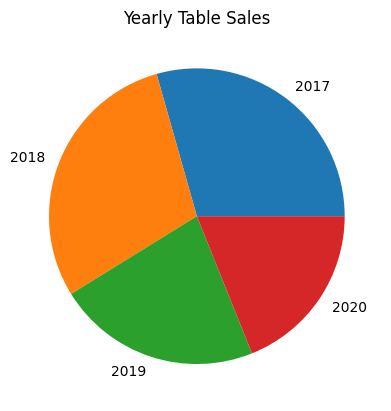

In [115]:
plt.pie(JustTablesYearsSales['Sales'], labels = JustTablesYearsSales['Year'])
plt.title('Yearly Table Sales');

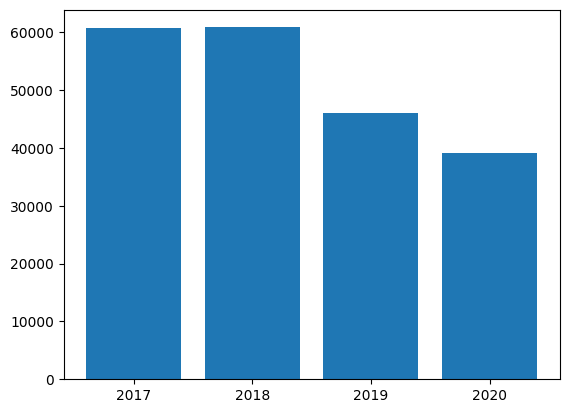

In [124]:
categories = [ str(i) for i in JustTablesYearsSales['Year'].values]

plt.bar(categories,JustTablesYearsSales['Sales']);